# Clase 1 : Regresión Lineal

## Ejemplo

Carga de librerías

In [35]:
import pandas as pd
import numpy as np
import os

Obtención de datos

In [36]:
mi_tabla = pd.read_csv("peliculas.csv") # Lectura de archivo
dataset = mi_tabla.select_dtypes(np.number) # Se obtienen datos numéricos 
dataset

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos
0,3500000.0,14.569650,28215918.0,91.0,7.0,513.0
1,12000000.0,9.592265,41205099.0,92.0,6.5,767.0
2,31000000.0,6.499680,185260553.0,117.0,6.7,303.0
3,52000000.0,18.761467,355237933.0,140.0,7.3,1637.0
4,2000000.0,11.528147,1275000.0,83.0,6.8,28.0
...,...,...,...,...,...,...
746,6000000.0,0.471086,11171900.0,135.0,5.6,5.0
747,2500000.0,0.209434,1477030.0,0.0,5.9,4.0
748,2000000.0,0.397106,8000000.0,81.0,3.1,7.0
749,463455.0,0.445526,966878.0,84.0,8.0,9.0


Selección de columnas

In [37]:
#Columnas del dataset
dataset.columns   

Index(['presupuesto', 'popularidad', 'ventas', 'duracion', 'puntuacion',
       'n_votos'],
      dtype='object')

In [38]:
objetivo = dataset["ventas"] # Variable a explicar
variables_ind = dataset[['presupuesto', 'popularidad', 'duracion', 'puntuacion','n_votos']]

In [39]:
#Columna a explicar
objetivo

0       28215918.0
1       41205099.0
2      185260553.0
3      355237933.0
4        1275000.0
          ...     
746     11171900.0
747      1477030.0
748      8000000.0
749       966878.0
750     66821036.0
Name: ventas, Length: 751, dtype: float64

In [40]:
#Variables independientes
variables_ind

,presupuesto,popularidad,duracion,puntuacion,n_votos
0,3500000.0,14.569650,91.0,7.0,513.0
1,12000000.0,9.592265,92.0,6.5,767.0
2,31000000.0,6.499680,117.0,6.7,303.0
3,52000000.0,18.761467,140.0,7.3,1637.0
4,2000000.0,11.528147,83.0,6.8,28.0
...,...,...,...,...,...
746,6000000.0,0.471086,135.0,5.6,5.0
747,2500000.0,0.209434,0.0,5.9,4.0
748,2000000.0,0.397106,81.0,3.1,7.0
749,463455.0,0.445526,84.0,8.0,9.0


Carga del modelo de Sklearn

In [41]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

Fit del modelo y valores del mismo

In [42]:
modelo.fit(X = variables_ind, y=objetivo)
print("Intercepción: ",modelo.intercept_)
print("Coeficientes del modelo: ",modelo.coef_)

Intercepción:  -9478485.213093765
Coeficientes del modelo:  [ 1.26822288e+00 -7.62386449e+05  6.63301758e+04  1.34984611e+06
  6.92704915e+04]


Se hace el predict y se crea una columna nueva que guarde esos valores

In [43]:
dataset["Co_predict"] = modelo.predict(variables_ind)
dataset["Co_predict"]

0      3.487332e+07
1      6.643402e+07
2      6.267471e+07
3      1.747015e+08
4      8.929894e+05
           ...     
746    1.463177e+07
747    1.773576e+06
748    2.797373e+06
749    7.763554e+06
750    4.607252e+07
Name: Co_predict, Length: 751, dtype: float64

Métricas del modelo

In [44]:
from sklearn import metrics

Error absoluto medio

In [45]:
metrics.mean_absolute_error(y_true = dataset['ventas'], y_pred=dataset['Co_predict'])

28052225.77567662

Error cuadratico medio

In [46]:
np.sqrt(metrics.mean_squared_error(y_true=dataset['ventas'],y_pred=dataset['Co_predict']))

49600844.70822838

R^2 --> Que tanto explica una variable de otra

In [47]:
modelo_r2 = metrics.r2_score(y_pred=dataset['Co_predict'],y_true=dataset['ventas'])
modelo_r2

0.5637730780447299

### Graficas

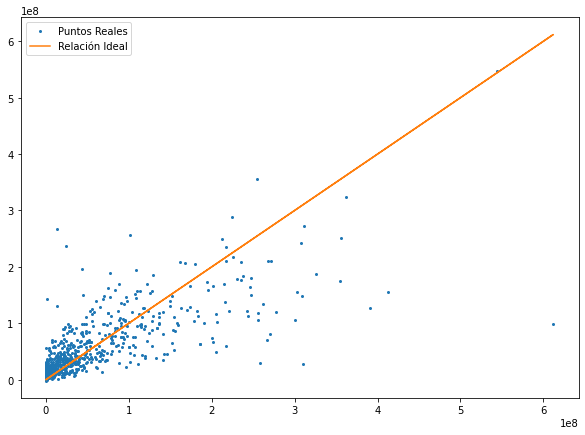

In [48]:
import matplotlib.pyplot as plt
x = dataset['ventas']
y = dataset['Co_predict']

plt.figure(figsize=(10,7))
plt.plot(x,y,'o',markersize=2)
plt.plot(x,x,"-")
plt.legend(["Puntos Reales","Relación Ideal"])
plt.show()